In [4]:
%matplotlib inline
import json
import pandas as pd
from collections import Counter
import matplotlib
from glob import glob

In [6]:
all_stats = {}
for jsonfile in glob('github.com/*/*/*.json'):
    with open(jsonfile) as jsonopenedfile:
        all_stats[jsonfile] = json.load(jsonopenedfile)

In [5]:
licenses = pd.Series(Counter([style_attributes['license'] for style_attributes in all_stats.values() if
                             style_attributes['license'] is not None]))

In [6]:
licenses.describe()

count     17.000000
mean      62.470588
std      122.330555
min        1.000000
25%        4.000000
50%       14.000000
75%       65.000000
max      493.000000
dtype: float64

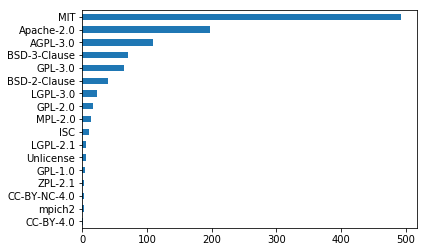

In [7]:
licenses = licenses.sort_values()
licenses.plot.barh()

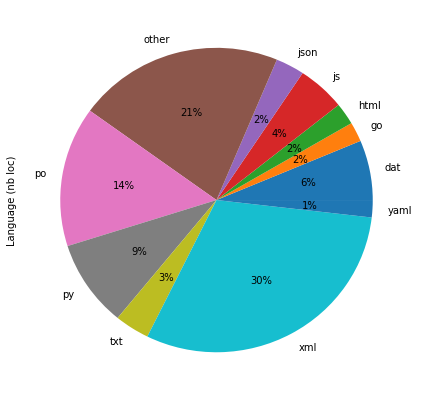

In [45]:
all_lines_of_code = Counter()
for stats in all_stats.values():
    all_lines_of_code.update(Counter(stats['lines_of_code']))
most_common = all_lines_of_code.most_common(10)
total = sum(all_lines_of_code.values())
other = total - sum(value for key, value in most_common)
most_common, total, other
most_common.append(('other', other))
pd.Series(dict(most_common), name="Language (nb loc)").plot.pie(figsize=(7, 7), autopct="%d%%")

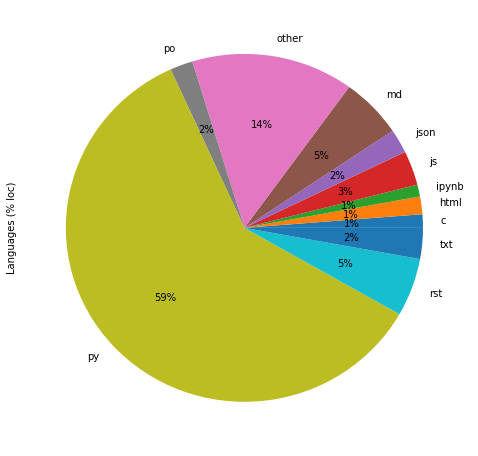

In [47]:
all_lines_of_code = Counter()
for stats in all_stats.values():
    total_lines_in_this_project = sum(stats['lines_of_code'].values())
    if total_lines_in_this_project == 0:
        continue
    percent_by_languages = Counter({key: value / total_lines_in_this_project for
                                    key, value in stats['lines_of_code'].items()})
    all_lines_of_code.update(percent_by_languages)
           

most_common = all_lines_of_code.most_common(10)
total = sum(all_lines_of_code.values())
other = total - sum(value for key, value in most_common)
most_common, total, other
most_common.append(('other', other))
pd.Series(dict(most_common), name="Languages (% loc)").plot.pie(figsize=(8, 8), autopct='%d%%')

In [ ]:
pe